In [47]:
## import pandas to use for importing data and data cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## import nfl salary data as nfl_salary
nfl_salary = pd.read_csv("C:/Users/camer/Desktop/nfl_salary.txt", delimiter = '\t')

This data is interesting because it can be used to compare salaries across different positions in the NFL. It will be
interesting to determine what position makes the most money on average and which positions have the most variation or widest 
range of salaries.

In [3]:
## view the top few rows of nfl_salary to make sure it read in correctly
nfl_salary.head()

,year,Cornerback,Defensive Lineman,Linebacker,Offensive Lineman,Quarterback,Running Back,Safety,Special Teamer,Tight End,Wide Receiver
0,2011,11265916,17818000,16420000,15960000,17228125.0,12955000,8871428,4300000.0,8734375,16250000
1,2011,11000000,16200000,15623000,12800000,16000000.0,10873833,8787500,3725000.0,8591000,14175000
2,2011,10000000,12476000,11825000,11767500,14400000.0,9479000,8282500,3556176.0,8290000,11424000
3,2011,10000000,11904706,10083333,10358200,14100000.0,7700000,8000000,3500000.0,7723333,11415000
4,2011,10000000,11762782,10020000,10000000,13510000.0,7500000,7804333,3250000.0,6974666,10800000


Data in long format is typically easier to read, so I want to change the dataframe to contain only 3 variables: year, position, and salary. Each row will then correspond to a different player, containing the year the observation was recorded, the position they played, and how much their salary was.

In [4]:
## use melt function to change the column names to a new variable 'position', with corresponding salary values
nfl_salary = pd.melt(nfl_salary, id_vars = ['year'], value_vars = ['Cornerback', 'Defensive Lineman', 'Linebacker',
                                                            'Offensive Lineman', 'Quarterback', 'Running Back', 'Safety',
                                                            'Special Teamer', 'Tight End', 'Wide Receiver'],
               var_name = 'Position', value_name = 'Salary')

In [5]:
## make sure pd.melt performed correctly
nfl_salary.head()

,year,Position,Salary
0,2011,Cornerback,11265916.0
1,2011,Cornerback,11000000.0
2,2011,Cornerback,10000000.0
3,2011,Cornerback,10000000.0
4,2011,Cornerback,10000000.0


In [6]:
## getting simple summary statistics of the salary variable and changing from scientific notation so it's easier to read
nfl_salary_description = nfl_salary['Salary'].describe()
pd.to_numeric(nfl_salary_description, downcast = 'float')

count        7944.00
mean      3487881.00
std       3628404.25
min         24705.00
25%        885000.00
50%       2266250.00
75%       4620379.00
max      37000000.00
Name: Salary, dtype: float32

In [7]:
## using .info to view variables and types. 
nfl_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
year        8000 non-null int64
Position    8000 non-null object
Salary      7944 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.6+ KB


When examining the output of the .info call, it looks like the salary column has fewer observations than the others, which
means it probably has missing values. I want to examine if there are any patterns in the missing data and decide whether to
drop the observations with missing data or input values.

In [8]:
## using .isnull to index out any columns that have null values
nfl_salary.columns[nfl_salary.isnull().any()]

Index(['Salary'], dtype='object')

The above code confirms that the salary variable has missing values.

In [9]:
## view the rows from nfl_salary that contain missing values 
nfl_salary[nfl_salary.isnull().any(axis = 1)]

,year,Position,Salary
3297,2011,Quarterback,NaN
3298,2011,Quarterback,NaN
3299,2011,Quarterback,NaN
3388,2012,Quarterback,NaN
3389,2012,Quarterback,NaN
3390,2012,Quarterback,NaN
3391,2012,Quarterback,NaN
3392,2012,Quarterback,NaN
3393,2012,Quarterback,NaN
3394,2012,Quarterback,NaN


It looks like the majority of players with missing salaries are Quarterbacks, with one special teams player. I'm planning on inputing the average special teams salary for players in 2011 for the special teamer with a missing salary, since it's only one value and likely wouldn't have changed the overall average and distribution of special teamer salaries. I'm only using the average in 2011 in case special team player salaries have changed over time.

In [10]:
## filter the nfl_salary dataframe for special teams players in 2011, then calculate the mean salary for those players and
## assign it to st_mean
sp_teamers_11 = nfl_salary.loc[(nfl_salary.Position == 'Special Teamer') & (nfl_salary.year == 2011)]
spec_team_mean = np.nanmean(sp_teamers_11.Salary)

In [11]:
## replace the missing salary for the special teams player with the previously calculated mean
nfl_salary.loc[(nfl_salary.Position == 'Special Teamer') & 
               (nfl_salary.year == 2011) &
               (nfl_salary.Salary.isnull()), 'Salary'] = spec_team_mean

Now to deal with the missing salaries for quarterbacks. I'm going to go through the same process of replacing each missing salary with the average quarterback salary for that year.

In [12]:
## create all_years which contains every year in the nfl_salary data
all_years = nfl_salary.year.unique()
print(all_years)

[2011 2012 2013 2014 2015 2016 2017 2018]


In [13]:
## create a for loop which filters for quarterbacks in each year and replaces missing salary values for a given year with the
## average quarterback salary for that year
for i in all_years:
    qbs_in_year = nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & (nfl_salary.year == i)]
    qb_mean = np.nanmean(qbs_in_year.Salary)
    nfl_salary.loc[(nfl_salary.Position == 'Quarterback') & 
               (nfl_salary.year == i) &
               (nfl_salary.Salary.isnull()), 'Salary'] = qb_mean

In [14]:
## double check that all missing values have been replaced
nfl_salary[nfl_salary.isnull().any(axis = 1)]

,year,Position,Salary


In [138]:
## triple check that all missing values have been replaced
nfl_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
year        8000 non-null int64
Position    8000 non-null object
Salary      8000 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.6+ KB


Now that the data is clean and there are no missing values, I'm going to create some summary statistics and graphs to answer
some questions of interest. Which position has the highest average salary? The highest median salary? Which position has the widest range of salaries?

In [16]:
## calculate the mean salary by position for each year
nfl_salary.groupby('Position')[['Position', 'Salary']].mean().sort_values('Salary')

,Salary
Position,
Special Teamer,1.353947e+06
Running Back,1.937492e+06
Tight End,1.964608e+06
Safety,2.542320e+06
Cornerback,3.607021e+06
Wide Receiver,3.904309e+06
Linebacker,4.488940e+06
Quarterback,4.525761e+06
Defensive Lineman,5.277673e+06


In [133]:
## calculate the median salary by position for each year
nfl_salary.groupby('Position')[['Position', 'Salary']].median().sort_values('Salary')

,Salary
Position,
Running Back,834569.5
Tight End,837913.0
Special Teamer,900000.0
Safety,1597381.5
Quarterback,1743750.0
Cornerback,2235577.0
Wide Receiver,2600000.0
Linebacker,3431139.0
Defensive Lineman,4145908.0


In [135]:
nfl_salary[['Position', 'Salary']].max()

Position    Wide Receiver
Salary            3.7e+07
dtype: object

In [136]:
nfl_salary[['Position', 'Salary']].min()

Position    Cornerback
Salary           24705
dtype: object

It looks like Offensive Lineman get paid the highest average and median salary. Let's see how the different positions' average salaries look over time.

In [59]:
avg_salaries = pd.DataFrame(nfl_salary.groupby(['Position', 'year']).mean())
print(avg_salaries)

                              Salary
Position          year              
Cornerback        2011  3.037766e+06
                  2012  3.132916e+06
                  2013  2.901798e+06
                  2014  3.038278e+06
                  2015  3.758543e+06
                  2016  4.201470e+06
                  2017  4.125692e+06
                  2018  4.659704e+06
Defensive Lineman 2011  4.306995e+06
                  2012  4.693730e+06
                  2013  4.547878e+06
                  2014  5.035355e+06
                  2015  5.037087e+06
                  2016  5.195377e+06
                  2017  6.202601e+06
                  2018  7.202360e+06
Linebacker        2011  4.016045e+06
                  2012  4.413994e+06
                  2013  3.858016e+06
                  2014  4.240293e+06
                  2015  4.413835e+06
                  2016  4.776801e+06
                  2017  4.898864e+06
                  2018  5.293675e+06
Offensive Lineman 2011  4.662748e+06
 

In [75]:
nfl_salary2 = nfl_salary.pivot_table(values = 'Salary', index = 'year', columns = 'Position', aggfunc = 'mean')
print(nfl_salary2)

Position  Cornerback  Defensive Lineman  Linebacker  Offensive Lineman  \
year                                                                     
2011      3037766.05         4306995.28  4016045.48         4662747.53   
2012      3132916.10         4693730.45  4413994.44         4307267.08   
2013      2901797.79         4547877.61  3858015.65         4534899.65   
2014      3038277.63         5035354.99  4240293.11         4898853.08   
2015      3758543.41         5037087.27  4413835.35         5080484.38   
2016      4201469.75         5195376.92  4776800.70         5410391.97   
2017      4125692.16         6202601.10  4898863.70         6370947.49   
2018      4659703.96         7202360.12  5293674.81         7522647.24   

Position   Quarterback  Running Back      Safety  Special Teamer   Tight End  \
year                                                                           
2011      3.376113e+06    1976340.74  2241891.36    1.244069e+06  1608100.30   
2012      3.496408e

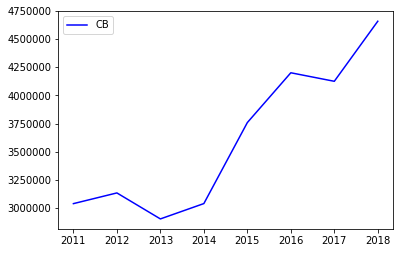

In [77]:
plt.plot(nfl_salary2.index, nfl_salary2.Cornerback, 'b-', label = 'CB')
plt.legend(loc = 'best')

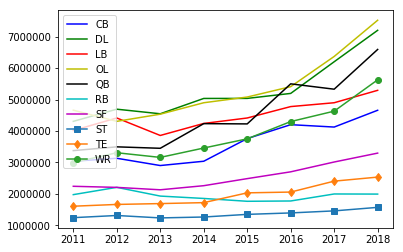

In [130]:
pos_columns = list(nfl_salary2)
pos_colors = {'Cornerback':'b-', 'Defensive Lineman':'g-', 'Linebacker':'r-', 'Offensive Lineman':'y-', 
              'Quarterback':'k-','Running Back':'c-', 'Safety':'m-', 'Special Teamer':'s-',
              'Tight End':'d-', 'Wide Receiver':'o-'}
pos_labels = {'Cornerback':'CB', 'Defensive Lineman':'DL', 'Linebacker':'LB', 'Offensive Lineman':'OL', 
              'Quarterback':'QB','Running Back':'RB', 'Safety':'SF', 'Special Teamer':'ST', 'Tight End':'TE', 
              'Wide Receiver':'WR'}
for pos in pos_columns:
    plt.plot(nfl_salary2.index, nfl_salary2[pos], pos_colors[pos], label = pos_labels[pos])
plt.legend(loc = 'best')

The average salary for most positions have been increasing over the past 8 years. However, the average salary for running backs
has decreased. Could this reflect less value being placed on running backsand increased value being placed on tight ends and 
wide receivers? That question would require more data to answer.

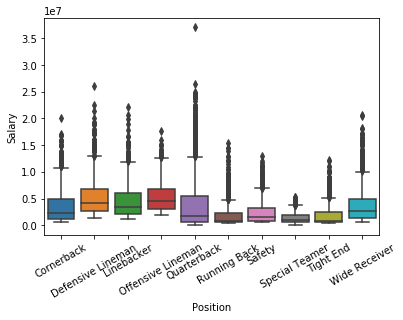

In [131]:
position_box = sns.boxplot(x = 'Position', y = 'Salary', data = nfl_salary)
position_box = position_box.set_xticklabels(position_box.get_xticklabels(), rotation=30)

It looks like offensive lineman not only have the highest salaries on average, they also have the widest range of salaries.

Overall, the average salaries for players in the NFL have been increasing during the past 8 years for every position except running backs. If you happen to have a shot at playing in the NFL, you probably want to play offensive line. They have the highest salary on average, although defensive lineman and quarterbacks have had very similar trends in salary. You may make a ton of money as a wide receiver, but you may want to avoid special teams and running back positions since they have lower salaries than other positions, and the average running back salary has been decreased in the last 8 years.

In [ ]:
travel_data = pd.read_excel("C:/Users/camer/Desktop/mbta.xlsx")

In [ ]:
travel_data.head()

In [ ]:
nfl_stats = pd.read_csv("C:/Users/camer/Desktop/nfl_stats.csv")

In [ ]:
nfl_stats.head()

In [66]:
nfl_salary

,year,Position,Salary
0,2011,Cornerback,11265916.0
1,2011,Cornerback,11000000.0
2,2011,Cornerback,10000000.0
3,2011,Cornerback,10000000.0
4,2011,Cornerback,10000000.0
5,2011,Cornerback,9244117.0
6,2011,Cornerback,8000000.0
7,2011,Cornerback,7900000.0
8,2011,Cornerback,7400000.0
9,2011,Cornerback,7000000.0
